In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('cost_revenue_dirty.csv')
data.shape #(5391, 6)
data.columns #['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
data.notna().values.any() #True
data.duplicated().any() #False

False

In [3]:
chars_to_remove = [',','$']
columns_to_clean = ['USD_Production_Budget','USD_Worldwide_Gross','USD_Domestic_Gross']

for col in columns_to_clean:
  for char in chars_to_remove:
    data[col] = data[col].astype(str).str.replace(char,"")
  # Converting string values to numerical values
  data[col] = pd.to_numeric(data[col])


<ipython-input-3-caca62670173>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char,"")


In [4]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [5]:
data['USD_Production_Budget'].mean() #31,113,737.57$
data['USD_Worldwide_Gross'].mean() #88,855,421.96$
data['USD_Worldwide_Gross'].min() #0$
data['USD_Domestic_Gross'].min() #0$
zero_rev = data[data.USD_Domestic_Gross == 0] #512 movies
zero_rev.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [6]:
zero_world = data[data.USD_Worldwide_Gross == 0]
zero_world.sort_values('USD_Production_Budget',ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [7]:
# what if we want to select our data based on more than one condition?
# For example, which films made money internationally (i.e., data.USD_Worldwide_Gross != 0),
# but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)?

# One approach is to use the .loc[] property:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]

In [8]:
# Another option is the .query() function
alt_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

In [9]:
# Removing movies that have have yet to be released
scrape_date = pd.Timestamp('2018-05-01')
future_releases = data[data.Release_Date >= scrape_date]
data_clean = data.drop(future_releases.index)

# Films that Lost Money
losses = data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
losses

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [10]:
import seaborn as sns

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

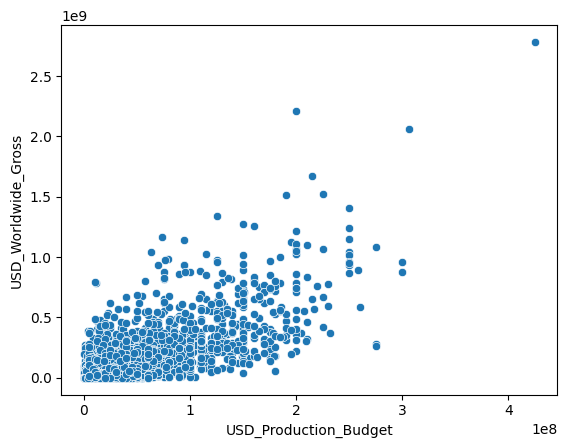

In [11]:
# Creating scatterplots
sns.scatterplot(data=data_clean,x='USD_Production_Budget',y='USD_Worldwide_Gross')

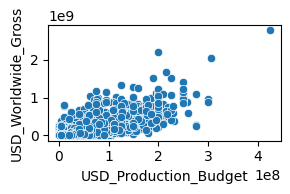

In [12]:
# Because Seaborn is built on top of Matplotlib, we can dive into the Matplotlib layer anytime to configure our chart:
plt.figure(figsize=(3,1.5),dpi=100)
sns.scatterplot(data=data_clean,x='USD_Production_Budget',y='USD_Worldwide_Gross')
plt.show()

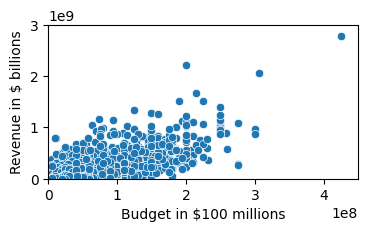

In [13]:
# And to style our chart we can simply configure the Axes object that is returned from sns.scatterplot()
plt.figure(figsize=(4,2),dpi=100)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross')
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

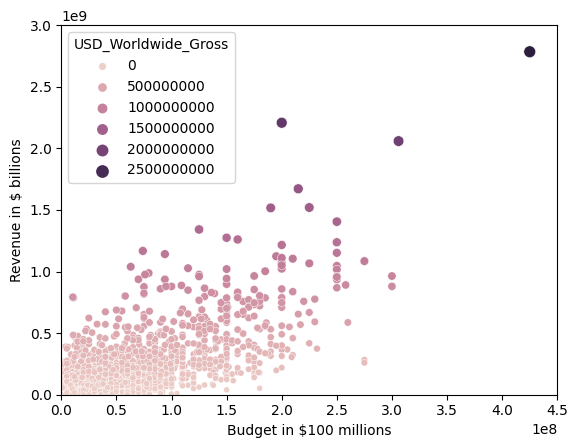

In [14]:
# he reason we're using Seaborn is because of the hue and size parameters that make it very easy to create a bubble chart.
# These parameters allow us to colour the data and change their size according to one of the columns in our DataFrame.
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()


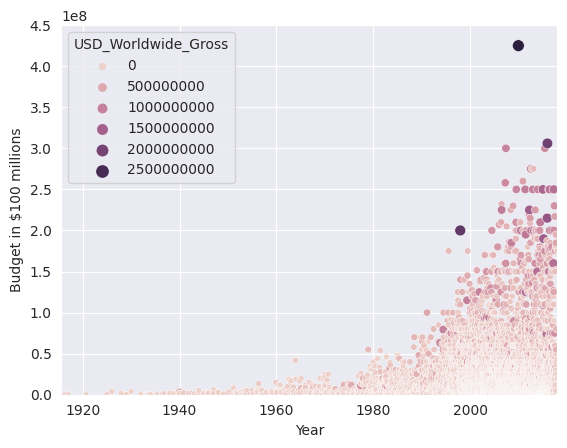

In [15]:
# Movie Budgets over Time
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean,
                    x='Release_Date',
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)

    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')
plt.show()

In [32]:
date_object = pd.DatetimeIndex(data=data_clean['Release_Date'])
date_years = date_object.year
decades = ((date_years//10)*10)
#data_clean.insert(6,'Decade', decades)
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [46]:
old_movies = data_clean[data_clean.Decade < 1970]
new_movies = data_clean[data_clean.Decade >= 1970]
print(old_movies.shape)
print(new_movies.shape)
old_movies[old_movies.USD_Production_Budget == old_movies.USD_Production_Budget.max()]

(153, 7)
(5231, 7)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

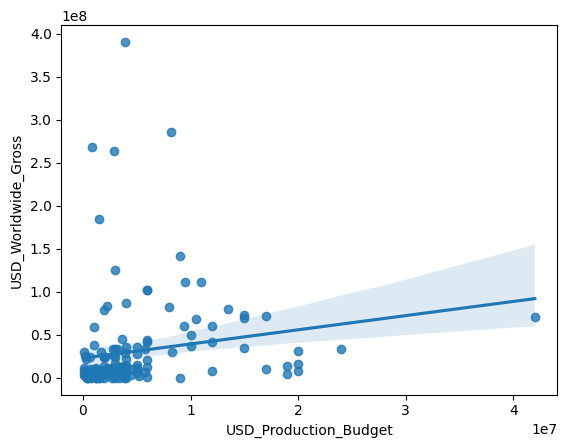

In [47]:
# Visualasing the relationship between the movie budget and the worldwide revenue using linear regression
# Seaborn allows us to do it with the .regplot() function
sns.regplot(data=old_movies,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

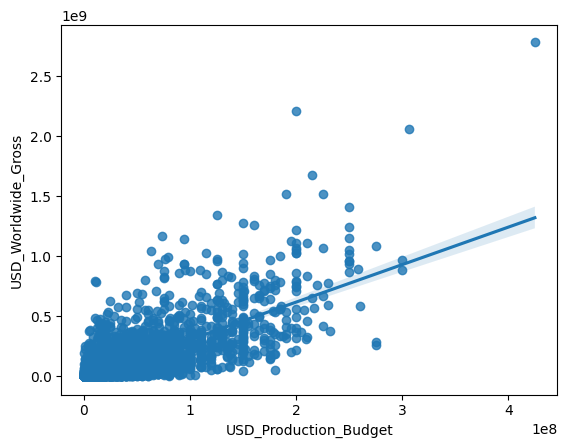

In [53]:
sns.regplot(data=new_movies,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

In [54]:
# We are using a univariate regression. This is a regression with a single explanatory variable (our movie BUDGET).
# Explanatory variables are also referred to as features in machine learning terminology.

# To find the best possible line, our regression will estimate the y-intercept ("theta zero") and the slope ("theta one").
# The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0.
# The slope tells us how much extra revenue we get for a $1 increase in the movie budget.

# To learn how we can find out what our model's estimates are for theta-one and theta-zero
# and how we can run our own regression, regardless of whether we want to visualise it on a chart,
# we can use scikit-learn.

from sklearn.linear_model import LinearRegression

In [55]:
# First, let's create a LinearRegression object that will do the work for us.
regression = LinearRegression()

In [66]:
# Now we can specify our features and our targets (i.e., our response variable).
# You will often see the features named capital X and the target named lower case y:

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_movies, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_movies, columns=['USD_Worldwide_Gross'])

In [67]:
# Find the best-fit line
regression.fit(X, y)

# Theta zero
regression.intercept_ # array([-8650768.00661027])

# Theta one
regression.coef_ # array([[3.12259592]])

array([[3.12259592]])

In [ ]:
# How do we interpret the y-intercept? Literally, means that if a movie budget is $0, the estimated movie revenue is -$8.65 million.
# This is unrealistic. The reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data.
# Because of that we have to careful how we interpret our data.


# What about the slope?
# The slope tells us that for every extra $1 in the budget, movie revenue increases by $3.1.

In [68]:
# One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

# R-squared
regression.score(X, y) # 0.5577032617720403
# This means that our model explains about 56% of the variance in movie revenue

0.5577032617720403

In [64]:
old_X = pd.DataFrame(old_movies, columns=['USD_Production_Budget'])
old_y = pd.DataFrame(old_movies, columns=['USD_Worldwide_Gross'])

regression.fit(old_X, old_y)
regression.intercept_ #array([22821538.63508039])
regression.coef_ #array([[1.64771314]])
regression.score(old_X, old_y) #0.02937258620576877, only 3%

0.02937258620576877

In [69]:
# Using the model to make a prediction
# How much global revenue does our model estimate for a film with a budget of $350 million?
# We can either go with (22821538 + 1.64771314 * 350000000) or
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $1.084e+09.
